In [42]:
import os

import sys
sys.path.append("..")

import cv2

import numpy as np

from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel

import matplotlib.pyplot as plt

In [22]:
filepath = os.path.join("..", "..", "..", "cds-vis-data", "data", "img", "terasse.jpeg")

In [23]:
image = cv2.imread(filepath)

In [24]:
image.shape

(1576, 1200, 3)

In [25]:
# blue channel - opencv uses bgr, channel 0 is blue
hist_blue = cv2.calcHist([image], [0], None, [255], [0, 256])
hist_green = cv2.calcHist([image], [1], None, [255], [0, 256])
hist_red = cv2.calcHist([image], [2], None, [255], [0, 256])

In [26]:
hist_channels = {
    "hist_blue": cv2.calcHist([image], [0], None, [255], [0, 256])
}

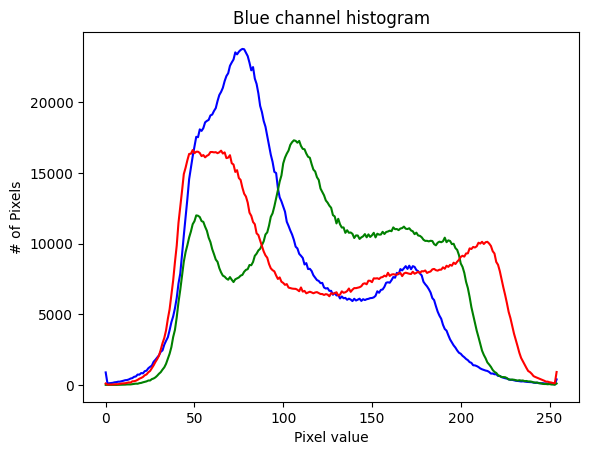

In [28]:
plt.figure()

plt.plot(hist_blue, color = "blue")
plt.plot(hist_green, color = "green")
plt.plot(hist_red, color = "red")

plt.title("Blue channel histogram")
plt.xlabel("Pixel value")
plt.ylabel("# of Pixels")
plt.show()

In [29]:
def visualizeHistogram(img):
    BLUE, GREEN, RED = cv2.split(img)

    plt.figure()

    plt.plot(cv2.calcHist([BLUE], [0], None, [255], [0, 256]), color = "blue")
    plt.plot(cv2.calcHist([GREEN], [0], None, [255], [0, 256]), color = "green")
    plt.plot(cv2.calcHist([RED], [0], None, [255], [0, 256]), color = "red")

    plt.title("Color histograms")
    plt.xlabel("Pixel value")
    plt.ylabel("# of Pixels")

    plt.show()
    

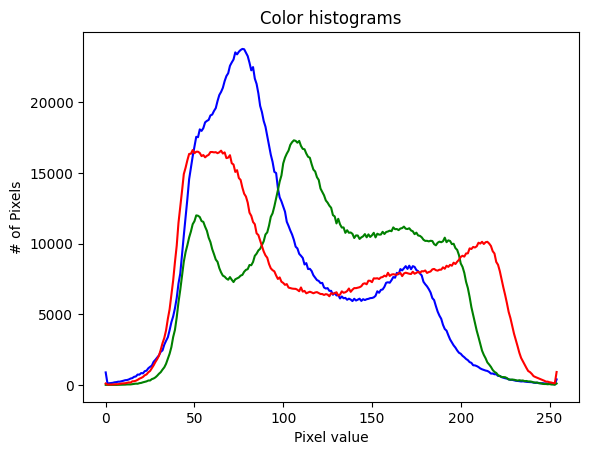

In [30]:
visualizeHistogram(image)

In [31]:
def visualizeHistogramRF(img):
    channels = cv2.split(img)
    colors = ("blue", "green", "red")

    plt.figure()
    
    counter = 0
    for channel in channels:
        hist = cv2.calcHist([channel], [0], None, [255], [0,256])
        plt.plot(hist, color = colors[counter])
        counter += 1

    plt.show()
    

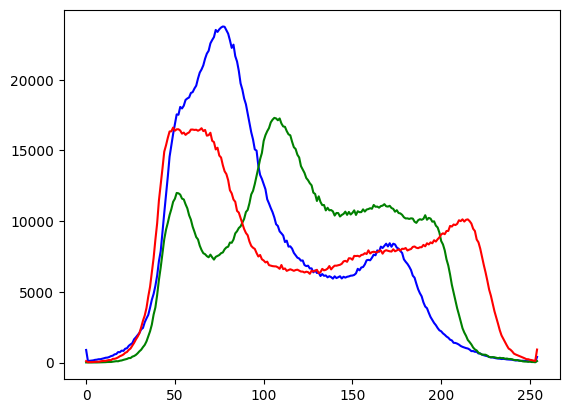

In [32]:
visualizeHistogramRF(image)

## Comparing histograms

In [33]:
filepath_1 = os.path.join("..", "..", "..", "cds-vis-data", "data", "img", "trex.png")
filepath_2 = os.path.join("..", "..", "..", "cds-vis-data", "data", "img", "t-rex2.png")

In [34]:
image_01 = cv2.imread(filepath_1)
image_02 = cv2.imread(filepath_2)

In [35]:
hist_01 = cv2.calcHist([image_01],[0, 1, 2], None, [255, 255, 255], [0, 256, 0, 256, 0, 256])
hist_02 = cv2.calcHist([image_02],[0, 1, 2], None, [255, 255, 255], [0, 256, 0, 256, 0, 256])

In [36]:
hist_01

array([[[  5.,   0.,   1., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0

In [38]:
normalized_hist_01 = cv2.normalize(hist_01, hist_01, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_02 = cv2.normalize(hist_02, hist_02, 0, 1.0, cv2.NORM_MINMAX)

pyimagesearch.com is a good resource

In [41]:
# score quantifies distance between histograms - higher distance equal more dissimiliar assumption - score doesn't say anything on its own (no norm)
round(cv2.compareHist(normalized_hist_01, normalized_hist_02, cv2.HISTCMP_CHISQR), 2)

33.76

In [65]:
# write a for loop which analyzes the entire "img" folder
folderpath = os.path.join("..", "..", "..", "cds-vis-data", "data", "img")
image_files = os.listdir(folderpath)

In [66]:
def visualizeHistogramAll(img, output_file_name):
    loaded_img = cv2.imread(img)
    channels = cv2.split(loaded_img)
    colors = ("blue", "green", "red")

    plt.figure()
    
    counter = 0
    for channel in channels:
        hist = cv2.calcHist([channel], [0], None, [255], [0,256])
        plt.plot(hist, color = colors[counter])
        counter += 1

    
    plt.savefig(outputpath)

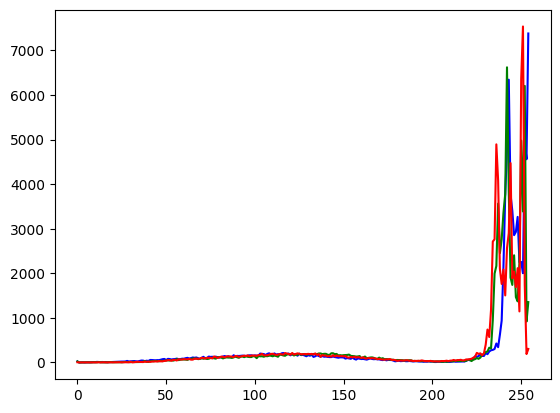

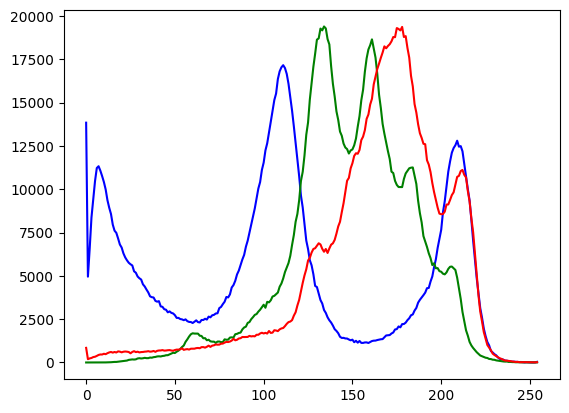

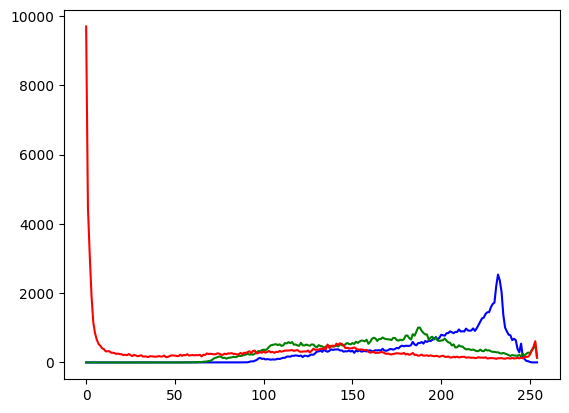

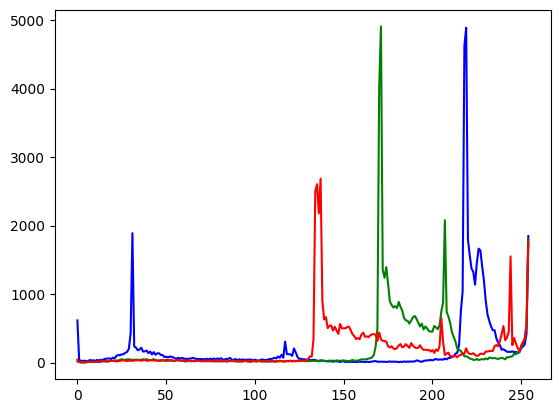

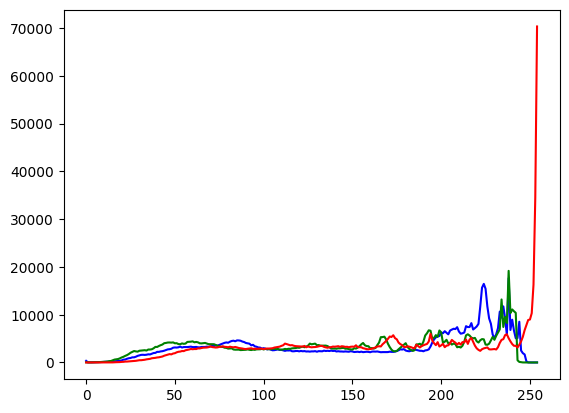

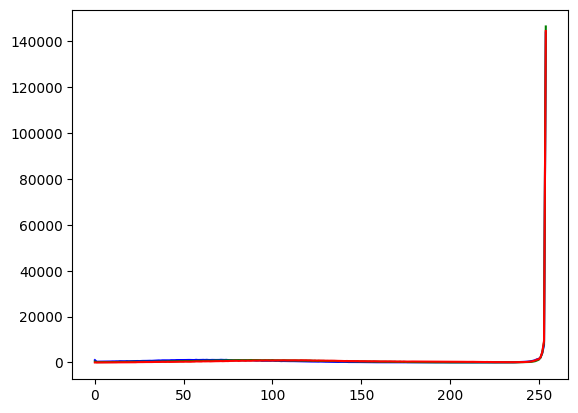

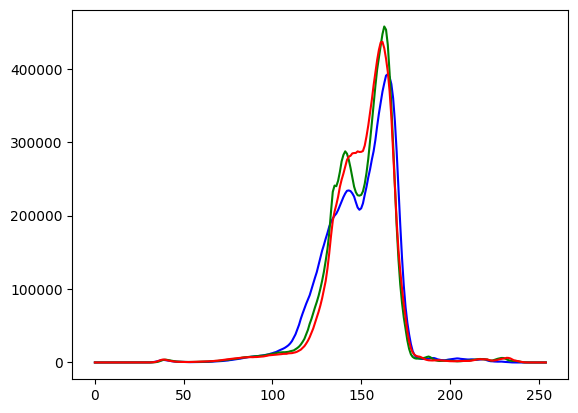

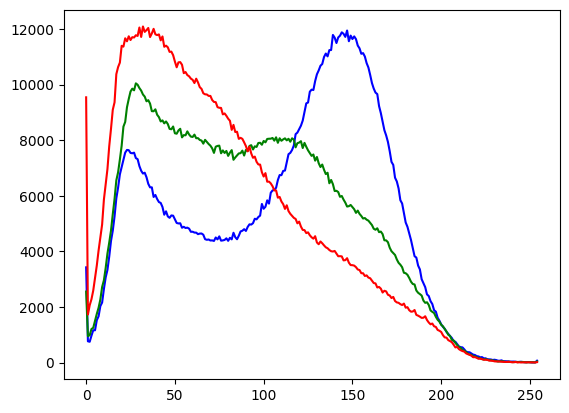

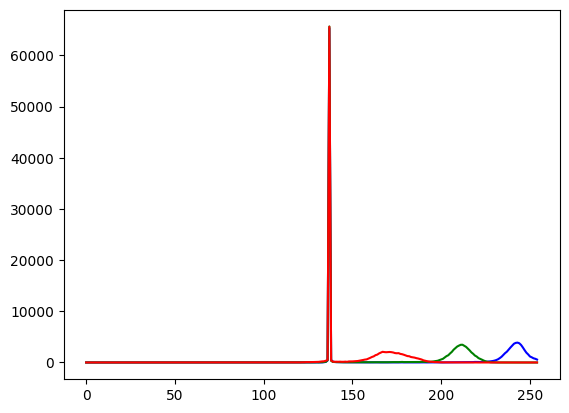

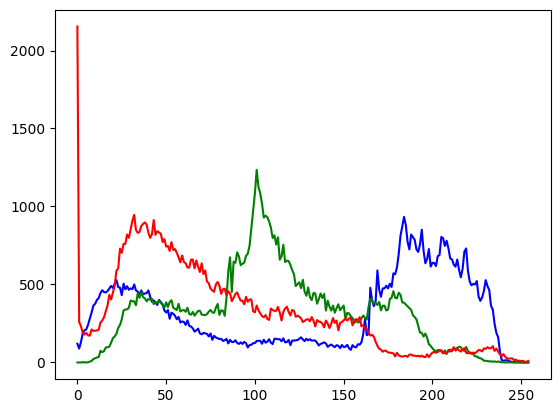

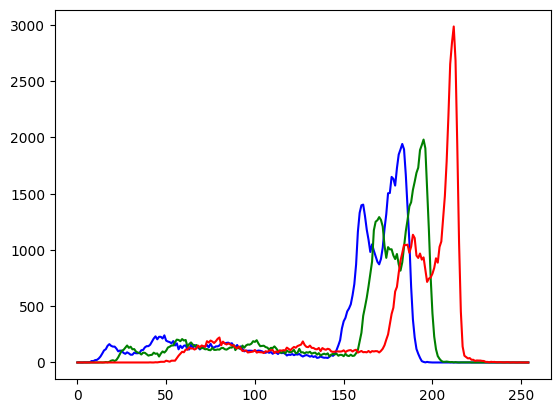

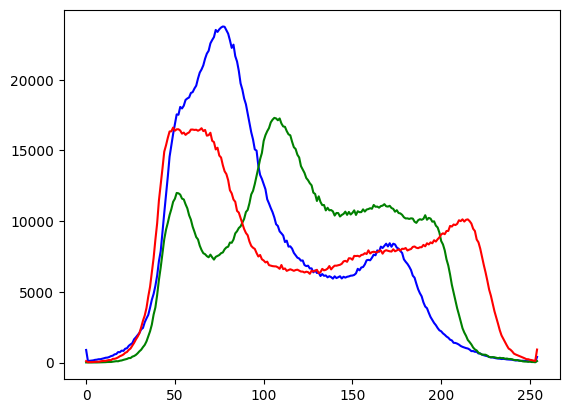

In [68]:
for image in image_files:
    image_path = os.path.join(folderpath, image)
    output_path = os.path.join("data", "session_03", image)
    visualizeHistogramAll(image_path, output_path)